## Vanilla Neural Network

### Importing libs

In [38]:
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import RMSprop,SGD,Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
import cv2
from keras_preprocessing.image import img_to_array
import tensorflow as tf
from keras.models import load_model

### load datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

### preprocessing input data

In [5]:
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


###  preprocessing output data

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
Y_train = np_utils.to_categorical(y_train, len(set(y_train)))
Y_test = np_utils.to_categorical(y_test, len(set(y_train)))

In [8]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### initializing the parameters

In [29]:
NB_EPOCH = 30  # epoch -> iterations -> 20 to 200
BATCH_SIZE = 128 # multiples of 64
VERBOSE = 1 
NB_CLASSES = 10 # output classes

OPTIMIZER = RMSprop()
N_HIDDEN = 128  # multiples of 64
VALIDATION_SPLIT = 0.1

DROPOUT = 0.1
graph = tf.get_default_graph()

### model defining

In [10]:
# # simple architecture
# model = Sequential()

# model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
# model.add(Activation('relu'))


# model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
# model.summary()

In [11]:
# # with hidden layers 
# model = Sequential()
# model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
# model.add(Activation('relu'))
# model.add(Dense(N_HIDDEN))
# model.add(Activation('relu'))
# model.add(Dense(NB_CLASSES))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
# model.summary()

In [12]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

### training

In [13]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 59us/step - loss: 0.3548 - acc: 0.8940 - val_loss: 0.1321 - val_acc: 0.9613
Epoch 2/30
54000/54000 [==============================] - 3s 52us/step - loss: 0.1543 - acc: 0.9535 - val_loss: 0.1065 - val_acc: 0.9653
Epoch 3/30
54000/54000 [==============================] - 3s 54us/step - loss: 0.1129 - acc: 0.9658 - val_loss: 0.0853 - val_acc: 0.9747
Epoch 4/30
54000/54000 [==============================] - 3s 54us/step - loss: 0.0893 - acc: 0.9728 - val_loss: 0.0792 - val_acc: 0.9763
Epoch 5/30
54000/54000 [==============================] - 3s 53us/step - loss: 0.0760 - acc: 0.9776 - val_loss: 0.0730 - val_acc: 0.9770
Epoch 6/30
54000/54000 [==============================] - 3s 54us/step - loss: 0.0660 - acc: 0.9795 - val_loss: 0.0710 - val_acc: 0.9787
Epoch 7/30
54000/54000 [==============================] - 3s 54us/step - loss: 0.

### testing

In [14]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 46us/step
Test accuracy: 0.9812


### results visualization

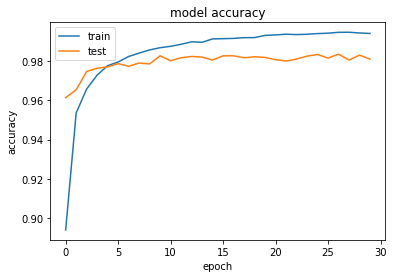

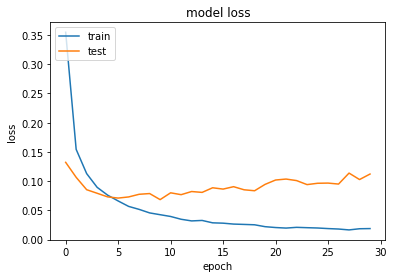

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### saving model

In [16]:
# method-1
model_json = model.to_json()
open('Maize-DL_architecture.json', 'w').write(model_json)
model.save_weights('Maize-DL_weights.h5', overwrite=True)

In [17]:
# method-2
model.save("./Deep_Learning/DL-Maize.model")

### Real-time prediction

In [18]:
img = cv2.imread("./Deep_Learning/zeros.png",0)

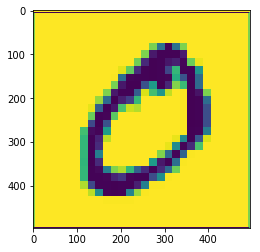

In [19]:
plt.imshow(img)
plt.show()

In [20]:
img = cv2.resize(img,(28,28))

In [21]:
img = img_to_array(img)

In [22]:
img = np.expand_dims(img,axis=0)

In [23]:
img=img.reshape(1,784)

In [24]:
img.shape

(1, 784)

In [39]:
LoadedModel = load_model("./Deep_Learning/DL-Maize.model")

In [40]:
LoadedModel.predict([img])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
LoadedModel.predict_classes([img])[0]

2

In [42]:
LoadedModel.predict_proba([img])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)